In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

# Spam/Ham dataset

In [34]:
# import data from TSV
sms_data=pd.read_csv('SMSSpamCollection.txt', sep='\t')
sms_data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# create a new column with inferred class
def f(row):
    if row['Label'] == "ham":
        val = 1
    else:
        val = 0
    return val


sms_data['Class'] = sms_data.apply(f, axis=1)
sms_data.head()

,Label,Text,Class
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [4]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)
features = vectorizer.fit_transform(
    sms_data['Text']
)

In [5]:
# split X and Y
X = features.toarray()
Y= sms_data['Class']

In [6]:
# split training and testing
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y,test_size=0.20, random_state=1)

In [26]:
log_model = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced')
log_model = log_model.fit(X_train, Y_train)

In [27]:
# make predictions
Y_pred = log_model.predict(X_test)

# make predictions
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred.flatten()})
pred_df.head()

,Actual,Predicted
1078,1,1
4028,1,1
958,1,1
4642,1,1
4674,1,1


In [28]:
# compute accuracy of the spam filter
print(accuracy_score(Y_test, Y_pred))

0.9901345291479821


In [29]:
# compute precision and recall
average_precision = average_precision_score(Y_test, Y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

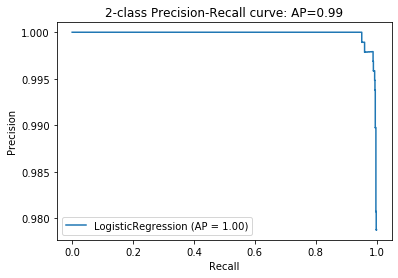

In [30]:
# precision-recall curve
disp = plot_precision_recall_curve(log_model, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [31]:
# look at the words learnt and their coefficients
coeff_df = pd.DataFrame({'coeffs': log_model.coef_.flatten(), 'Words': vectorizer.get_feature_names()}, )  
# Words with highest coefficients -> predictive of 'Ham'
coeff_df.nlargest(10, 'coeffs') 

,coeffs,Words
6794,1.102503,gt
7678,1.093458,lt
8033,1.026936,my
6945,0.875205,him
7807,0.844030,me
7472,0.771540,later
9727,0.721462,still
3673,0.713612,So
6729,0.703457,good
4583,0.695946,am


In [32]:
# Words with highest coefficients -> predictive of 'Spam'
coeff_df.nsmallest(10, 'coeffs') 

,coeffs,Words
349,-2.677172,146tf150p
4011,-2.073133,Txt
1387,-1.929714,Call
3380,-1.877142,Reply
799,-1.828268,84484
9083,-1.828268,ringtoneking
10001,-1.825703,text
9306,-1.764075,service
1846,-1.718808,FREE
358,-1.691865,150p


# Upload review dataset

In [3]:
# import data from TSV
rev_data=pd.read_csv('book_reviews.csv')
rev_data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [4]:
# fix issues with format text
reviews = rev_data['reviewText'].apply(lambda x: np.str_(x))

In [5]:
# create a new column with inferred class
def f(row):
    if row['overall'] > 3:
        val = 1
    else:
        val = 0
    return val


rev_data['Class'] = rev_data.apply(f, axis=1)
rev_data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Class
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,1
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,1
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,1
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1


In [6]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words='english'
)
features = vectorizer.fit_transform(reviews)


In [7]:
# split X and Y
X = features.toarray()
Y= rev_data['Class']

In [17]:
# split training and testing
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y,test_size=0.20, random_state=1)

In [18]:
log_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200)
log_model = log_model.fit(X_train, Y_train)

In [19]:
# make predictions
Y_pred = log_model.predict(X_test)

# make predictions
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred.flatten()})
pred_df.head()

,Actual,Predicted
2065,1,1
5361,0,0
961,1,1
1756,0,1
2764,0,0


In [20]:
# compute accuracy of the sentiment analysis
print(accuracy_score(Y_test, Y_pred))

0.815


In [21]:
# compute precision and recall
average_precision = average_precision_score(Y_test, Y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.85


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.85')

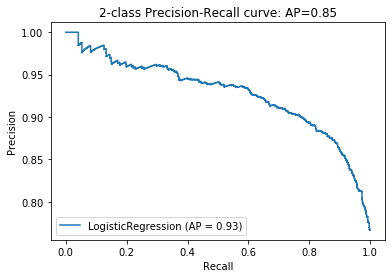

In [22]:
# precision-recall curve
disp = plot_precision_recall_curve(log_model, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [23]:
# look at the words learnt and their coefficients
coeff_df = pd.DataFrame({'coeffs': log_model.coef_.flatten(), 'Words': vectorizer.get_feature_names()}, )  
# Words with highest coefficients -> predictive of 'good reviews'
coeff_df.nlargest(10, 'coeffs') 

,coeffs,Words
8792,1.854251,excellent
27010,1.718150,wonderful
26390,1.561226,wait
14630,1.538485,loved
24854,1.385609,touch
2151,1.337593,awesome
6603,1.275726,delightful
7743,1.237599,drug
26000,1.196949,variety
13321,1.177073,job


In [24]:
# Words with highest coefficients -> predictive of 'bad reviews'
coeff_df.nsmallest(10, 'coeffs') 

,coeffs,Words
16909,-2.010607,okay
7129,-1.837605,disappointing
7626,-1.546038,dragged
18504,-1.519631,predictable
26512,-1.383739,waste
25663,-1.344655,unless
2411,-1.344066,basic
16093,-1.339997,mundane
6767,-1.330325,describing
24071,-1.279319,taste
